In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

Exploratory Data Analysis

In [9]:
data = pd.read_csv('../data/data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [10]:
#feature names as a list, checking the column names
col = data.columns
print(col)


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [11]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [12]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

This is an 'id' that can not be used for classification and 'diagnosis' is our class label and 'Unnamed:32 'feature inclueds NaN which we won't be needing. So we will be dropping these unnecessary features.

In [13]:
#y is the target lables variables, X is the feature variable
y = data.diagnosis
list = [ 'Unnamed: 32', 'id', 'diagnosis']
x = data.drop(list, axis=1)
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Number of Bening, 357
Number of Malignant Tumors, 212


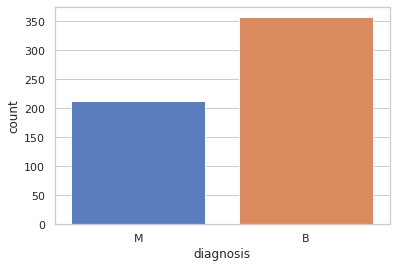

In [14]:
ax = sns.countplot(y, label= "Count")
B, M = y.value_counts()
print(f'Number of Bening, {B}')
print(f'Number of Malignant Tumors, {M}')

Above is plot of diagnosis distributions

In [15]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Visualization
I will be using seaborn plots

Violin Plots

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

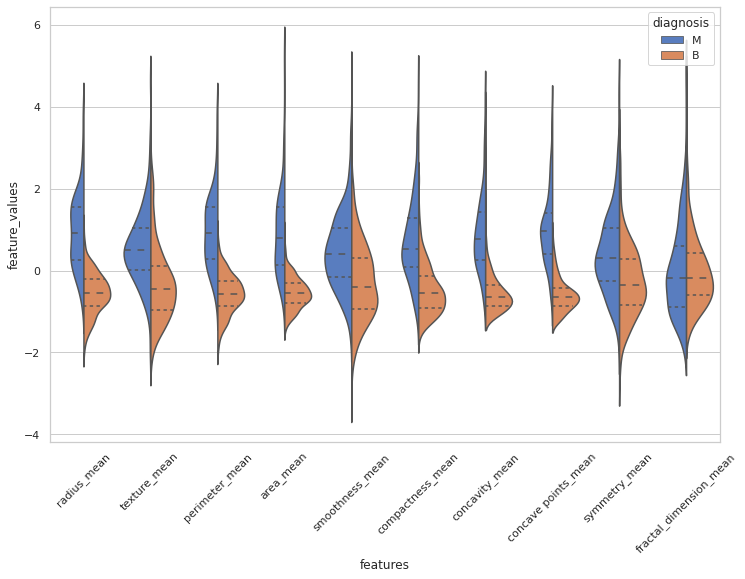

In [16]:
# checking first ten features 
data1 = x
data1_std = (data1 - data1.mean()) / data1.std()
#standardizing the data
data1 =pd.concat([y, data1_std.iloc[:, 0: 10]], axis=1)
data1 = pd.melt( data1,
                id_vars='diagnosis', 
                var_name='features', 
                value_name='feature_values')
plt.figure(figsize=(12,8))
sns.violinplot(x='features', y='feature_values', hue='diagnosis', data=data1, split = True, inner = 'quart')
plt.xticks( rotation = 45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

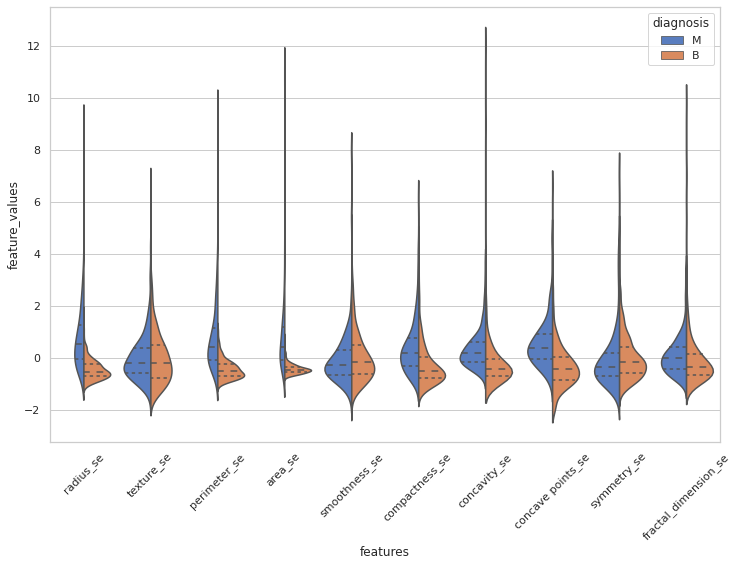

In [17]:
#checking second ten feature
data2 = x
data2_std = (data2 - data2.mean()) / data2.std()
data2 =pd.concat([y, data1_std.iloc[:, 10: 20]], axis=1)
data2 = pd.melt( data2,
                id_vars='diagnosis',
                var_name='features', 
                value_name='feature_values')
plt.figure(figsize=(12,8))
sns.violinplot(x='features', y='feature_values', hue='diagnosis', data=data2, split = True, inner = 'quart')
plt.xticks( rotation = 45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

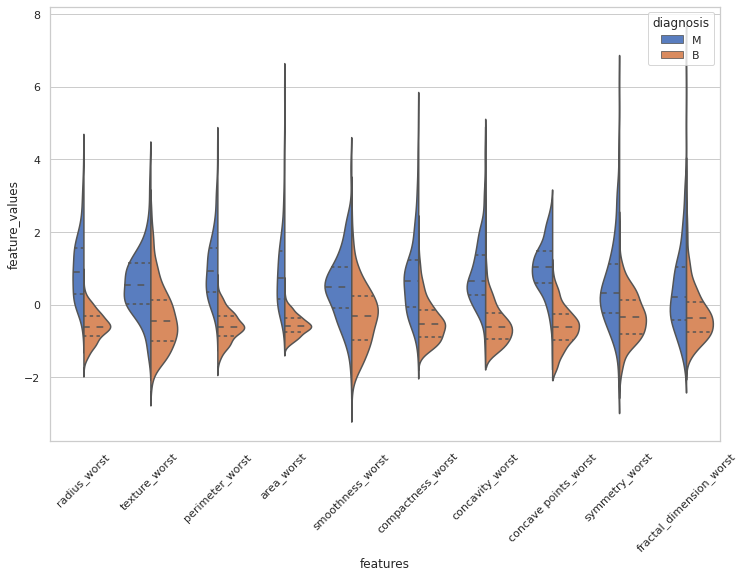

In [18]:
#checking third ten feature
data3 = x
data3_std = (data3 - data3.mean()) / data3.std()
data3 =pd.concat([y, data3_std.iloc[:, 20: 30]], axis=1)
data3 = pd.melt( data3,
                id_vars='diagnosis',
                var_name='features', 
                value_name='feature_values')
plt.figure(figsize=(12,8))
sns.violinplot(x='features', y='feature_values', hue='diagnosis', data=data3, split = True, inner = 'quart')
plt.xticks( rotation = 45)

box plot and outliers

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

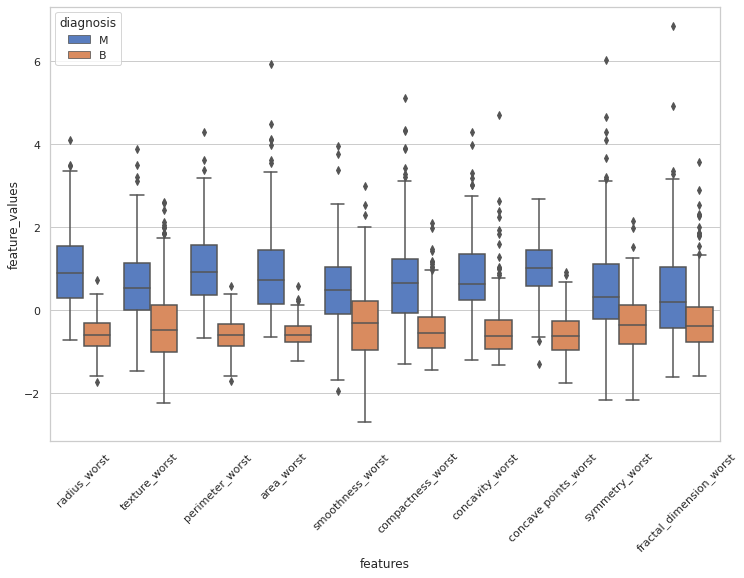

In [19]:
plt.figure(figsize = [12, 8] )
sns.boxplot( x = 'features', y = 'feature_values', hue = 'diagnosis', data = data3)
plt.xticks( rotation = 45)

Using joint plots

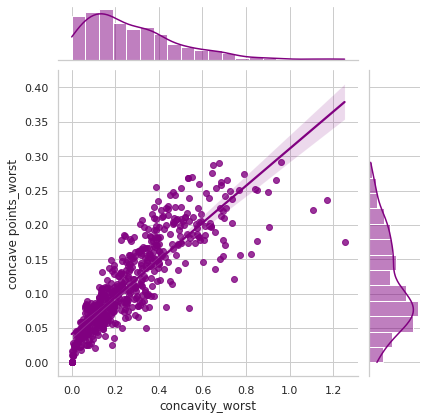

In [20]:
sns.jointplot( x.loc[:, 'concavity_worst'], x.loc[:, 'concave points_worst'], kind = 'reg', color ='purple')


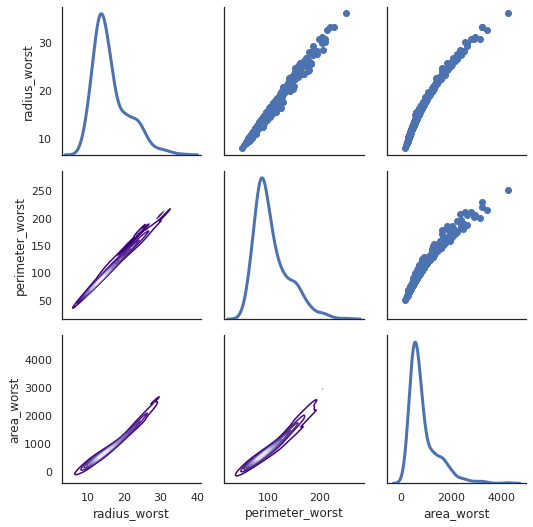

In [37]:
sns.set(style="white")
df = x.loc[:,['radius_worst','perimeter_worst','area_worst']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Purples_r")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

Observing the distribution of values using swarm plots

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

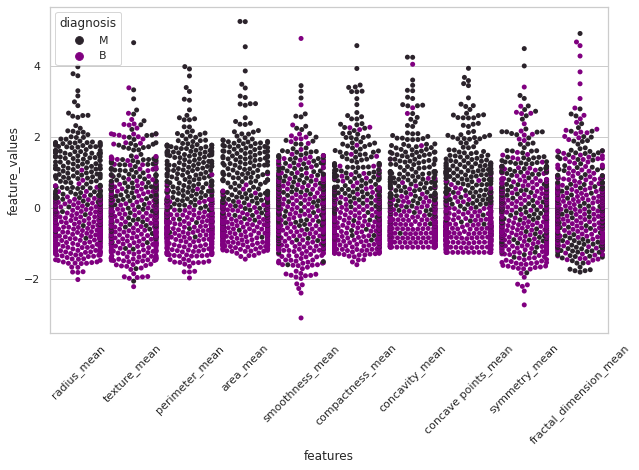

In [39]:
plt.figure(figsize = [10, 6] )
sns.set(style = 'whitegrid', palette = 'muted')
sns.swarmplot( x ='features', y = 'feature_values', hue = 'diagnosis', data = data1, color ='purple')
plt.xticks( rotation = 45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

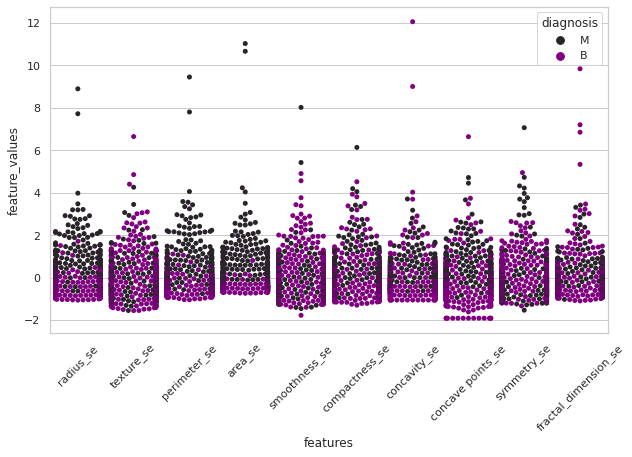

In [38]:
plt.figure(figsize = [10, 6] )
sns.set(style = 'whitegrid', palette = 'muted')
sns.swarmplot( x ='features', y = 'feature_values', hue = 'diagnosis', data = data2, color ='purple')
plt.xticks( rotation = 45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

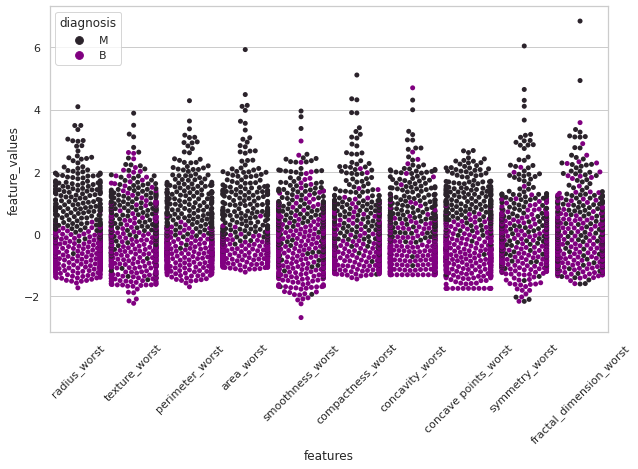

In [26]:
plt.figure(figsize = [10, 6] )
sns.set(style = 'whitegrid', palette = 'muted')
sns.swarmplot( x ='features', y = 'feature_values', hue = 'diagnosis', data = data3, color ='purple')
plt.xticks( rotation = 45)

Observation
- variance is not clear
- area_worst in last swarm plot looks like malignant and benign are seprated not totaly but mostly.
- Hovewer, smoothness_se in swarm plot 2 looks like malignant and benign are mixed so it is hard to classfy while using this feature.

Observing all pair-wise correlations

<AxesSubplot:>

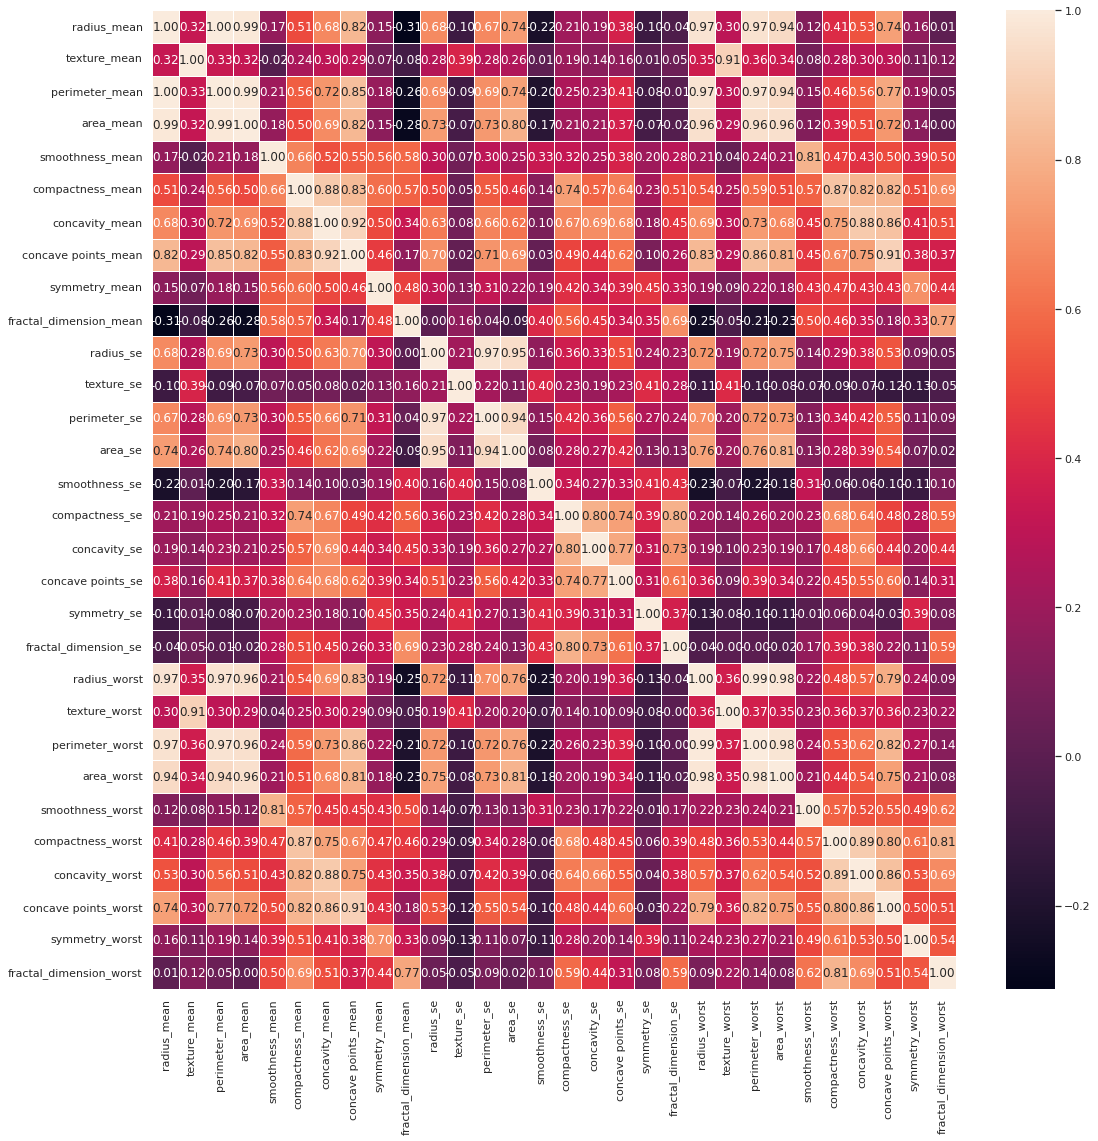

In [28]:
f, ax = plt.subplots(figsize = (18,18))
sns.heatmap(x.corr(), annot=True, linewidths=0.5, fmt='.2f', ax=ax, color= 'purple')
                     

In [ ]:
``